<h3>Regression</h3>

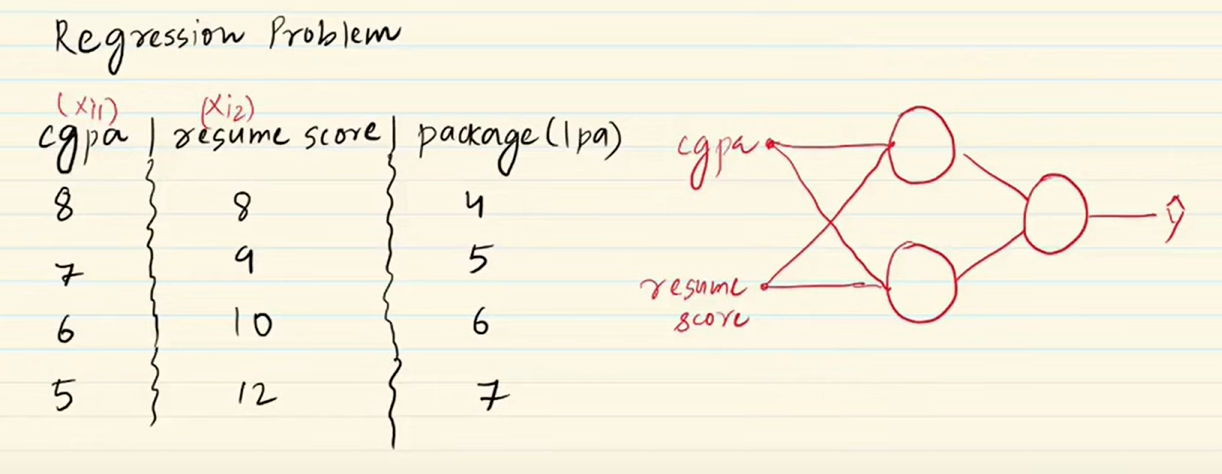

In [37]:
from IPython.display import display, Image

# Display image from file
display(Image(filename='./5a. toy_regression.png'))

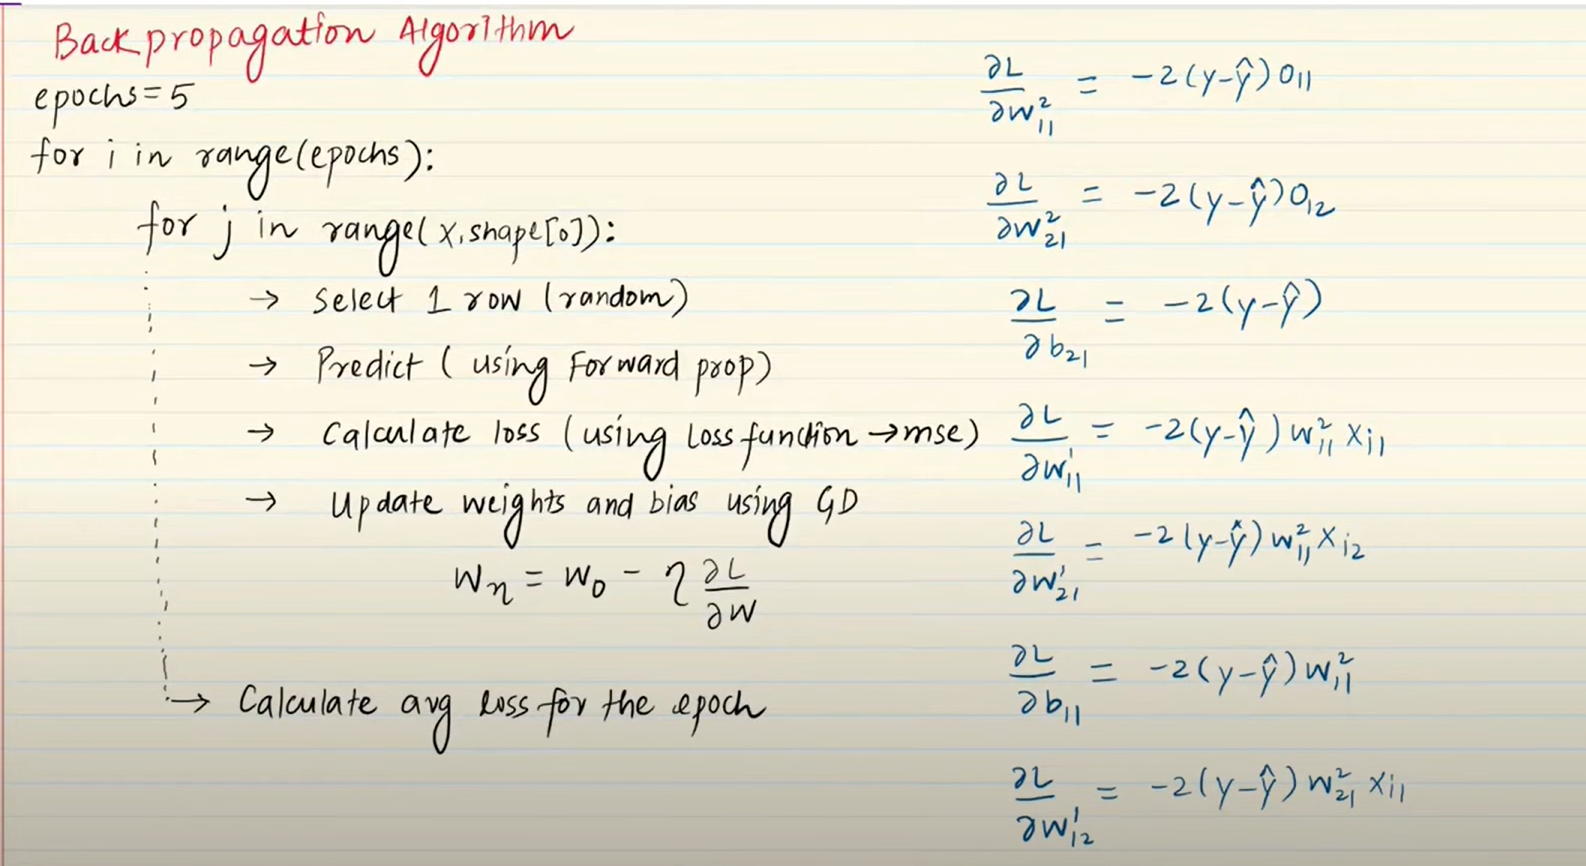

In [38]:
from IPython.display import display, Image

# Display image from file
display(Image(filename='./5a. backprop_regression.png'))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [2]:
def initialize_parameters(layer_dims):
  
  # np.random.seed(3)
  parameters = {}
  L = len(layer_dims)         

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
      

  return parameters

In [3]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [4]:
def linear_forward(A_prev, W, b):
  
  Z = np.dot(W.T, A_prev) + b
  
  return Z

In [10]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)
          
  return A,A_prev

In [9]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

A0:  [[8]
 [8]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[1.6]
 [1.6]]
****************************************
A1:  [[1.6]
 [1.6]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.32]]
****************************************


In [11]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [14]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [15]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]),
 'b1': array([[0.0019667],
        [0.0019667]]),
 'W2': array([[0.12712927],
        [0.12712927]]),
 'b2': array([[0.13612818]])}

In [16]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.12409711, 0.13272353],
        [0.12412266, 0.13276611]]),
 'b1': array([[0.00355129],
        [0.00355555]]),
 'W2': array([[0.14692424],
        [0.14731907]]),
 'b2': array([[0.15810417]])}

In [17]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.13482804, 0.15847776],
        [0.1349909 , 0.15884991]]),
 'b1': array([[0.00569748],
        [0.0057292 ]]),
 'W2': array([[0.17312488],
        [0.17534027]]),
 'b2': array([[0.18773702]])}

In [18]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729625
Epoch -  4 Loss -  3.252093863403161
Epoch -  5 Loss -  1.3407132589299964


{'W1': array([[0.26507636, 0.38558861],
        [0.27800387, 0.40980287]]),
 'b1': array([[0.02749056],
        [0.02974394]]),
 'W2': array([[0.41165744],
        [0.48302736]]),
 'b2': array([[0.48646246]])}

In [19]:
# bingo!!!

In [20]:
# Let's do a quick Keras implementation as well!

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(2, activation = 'linear', input_dim = 2))
model.add(Dense(1, activation = 'linear'))

model.summary()

C:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.get_weights()

[array([[0.19033158, 0.8434607 ],
        [0.88590753, 0.75382984]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.84426475],
        [ 0.05241144]], dtype=float32),
 array([0.], dtype=float32)]

In [29]:
new_weights = [np.array([[0.1, 0.1], 
                          [0.1, 0.1]], dtype=np.float32),

               np.array([0., 0.], dtype=np.float32),
               np.array([[0.1],
                          [0.1]], dtype=np.float32),

               np.array([0.], dtype=np.float32)]

In [30]:
model.set_weights(new_weights)

In [31]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [34]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'mean_squared_error', optimizer = optimizer)

In [35]:
model.fit(df.iloc[:, 0:-1].values, df['lpa'].values, epochs = 75, verbose = 1, batch_size = 1)

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 24.3749
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.4128
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 32.9632
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 22.0444 
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 31.7278 
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 23.3570
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 20.8582 
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 24.3139
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 22.7494 
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 21.4399 
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 27.2435
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 21.7718 
Epoch 13/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.9063 
Epoch 14/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 26.4794 
Epoch 15/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 25.4924 
Epoch 16/7

In [36]:
model.get_weights()

[array([[0.3735729, 0.3735729],
        [0.3657427, 0.3657427]], dtype=float32),
 array([0.27238327, 0.27238327], dtype=float32),
 array([[0.3729924],
        [0.3729924]], dtype=float32),
 array([0.2049063], dtype=float32)]